In [1]:
!pip install anndata

In [2]:
!pip install scanpy

In [1]:
import scanpy as sc
import anndata
import importlib
from sklearn.decomposition import PCA

import matplotlib as mpl

In [2]:
import h5py
import anndata

# Read the data into an AnnData object
adata_allcell = anndata.read_h5ad('TabulaSapiens_AllCells.h5ad')

print(adata_allcell) 

AnnData object with n_obs × n_vars = 483152 × 58604
    obs: 'tissue_in_publication', 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: '_scvi', '_training_mode', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_id_c

In [3]:
#shape of data matrix
print(adata_allcell.shape)

(483152, 58604)


In [4]:
#view variable names(genes)
print(adata_allcell.var_names)

Index(['ENSG00000223972', 'ENSG00000227232', 'ENSG00000278267',
       'ENSG00000243485', 'ENSG00000284332', 'ENSG00000237613',
       'ENSG00000268020', 'ENSG00000240361', 'ENSG00000186092',
       'ENSG00000238009',
       ...
       'ENSG00000198886', 'ENSG00000210176', 'ENSG00000210184',
       'ENSG00000210191', 'ENSG00000198786', 'ENSG00000198695',
       'ENSG00000210194', 'ENSG00000198727', 'ENSG00000210195',
       'ENSG00000210196'],
      dtype='object', name='ensemblid', length=58604)


In [5]:
#view observation names(cell)
print(adata_allcell.obs_names)

Index(['AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1',
       'AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1',
       'AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1',
       'AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1',
       'AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1',
       'AAAGAACGTTTCTTAC_TSP6_Liver_NA_10X_1_1',
       'AAAGAACTCCTTATGT_TSP6_Liver_NA_10X_1_1',
       'AAAGAACTCTTCTCAA_TSP6_Liver_NA_10X_1_1',
       'AAAGGATAGTCGAAAT_TSP6_Liver_NA_10X_1_1',
       'AAAGGATCAAATCAGA_TSP6_Liver_NA_10X_1_1',
       ...
       'TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P18_S378',
       'TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P19_S379',
       'TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P21_S381',
       'TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P2_S362',
       'TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P3_S363',
       'TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P4_S364',
       'TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothe

In [6]:
adata_allcell.obs

,tissue_in_publication,assay_ontology_term_id,donor_id,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,...,development_stage_ontology_term_id,self_reported_ethnicity_ontology_term_id,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7633.0,2259,macrophage,Monocyte/Macrophage,True,immune,...,HsapDv:0000161,HANCESTRO:0005,macrophage,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,2858.0,1152,monocyte,Monocyte,True,immune,...,HsapDv:0000161,HANCESTRO:0005,monocyte,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7787.0,2983,endothelial cell of hepatic sinusoid,Endothelial,True,endothelial,...,HsapDv:0000161,HANCESTRO:0005,endothelial cell of hepatic sinusoid,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,10395.0,2598,macrophage,Monocyte/Macrophage,True,immune,...,HsapDv:0000161,HANCESTRO:0005,macrophage,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,6610.0,2125,liver dendritic cell,Dendritic cell,True,immune,...,HsapDv:0000161,HANCESTRO:0005,liver dendritic cell,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P4_S364,Vasculature,EFO:0008931,TSP2,aorta,13205.0,579,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P5_S365,Vasculature,EFO:0008931,TSP2,aorta,9565.0,529,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367,Vasculature,EFO:0008931,TSP2,aorta,195639.0,2753,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P8_S368,Vasculature,EFO:0008931,TSP2,aorta,37260.0,984,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage


In [7]:
adata_allcell.var

,feature_type,highly_variable,means,dispersions,dispersions_norm,mean,std,feature_is_filtered,feature_name,feature_reference,feature_biotype
ensemblid,,,,,,,,,,,
ENSG00000223972,Gene Expression,False,6.398244e-05,0.835044,-0.573947,0.000039,0.005574,False,DDX11L1,NCBITaxon:9606,gene
ENSG00000227232,Gene Expression,False,2.274395e-03,2.442280,0.533203,0.001080,0.031731,False,WASH7P,NCBITaxon:9606,gene
ENSG00000278267,Gene Expression,False,6.175251e-05,1.295335,-0.256874,0.000033,0.005634,False,MIR6859-1,NCBITaxon:9606,gene
ENSG00000243485,Gene Expression,False,1.372886e-04,2.656352,0.680668,0.000048,0.008041,False,MIR1302-2HG,NCBITaxon:9606,gene
ENSG00000284332,Gene Expression,False,1.000000e-12,NaN,0.000000,0.000000,1.000000,False,MIR1302-2,NCBITaxon:9606,gene
...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695,Gene Expression,False,9.634841e-01,2.466404,0.154140,0.590065,0.741395,False,MT-ND6,NCBITaxon:9606,gene
ENSG00000210194,Gene Expression,False,1.600667e-01,1.603787,-0.044396,0.083929,0.301820,False,MT-TE,NCBITaxon:9606,gene
ENSG00000198727,Gene Expression,False,4.367693e+00,4.765751,-0.499747,3.874830,1.104192,False,MT-CYB,NCBITaxon:9606,gene


Preprocessing

In [8]:
#removing cells with less than 500 genes
sc.pp.filter_cells(adata_allcell, min_genes=500)

In [9]:
#removing genes with less than 3 cells
sc.pp.filter_genes(adata_allcell, min_cells=3)

In [10]:
#shape of data matrix
print(adata_allcell.shape)

(469291, 56353)


In [11]:
# Normalization
sc.pp.normalize_total(adata_allcell)
sc.pp.log1p(adata_allcell)

In [12]:
adata_allcell.obs

,tissue_in_publication,assay_ontology_term_id,donor_id,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,...,development_stage_ontology_term_id,self_reported_ethnicity_ontology_term_id,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7633.0,2258,macrophage,Monocyte/Macrophage,True,immune,...,HsapDv:0000161,HANCESTRO:0005,macrophage,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,2858.0,1152,monocyte,Monocyte,True,immune,...,HsapDv:0000161,HANCESTRO:0005,monocyte,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7787.0,2981,endothelial cell of hepatic sinusoid,Endothelial,True,endothelial,...,HsapDv:0000161,HANCESTRO:0005,endothelial cell of hepatic sinusoid,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,10395.0,2594,macrophage,Monocyte/Macrophage,True,immune,...,HsapDv:0000161,HANCESTRO:0005,macrophage,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,6610.0,2124,liver dendritic cell,Dendritic cell,True,immune,...,HsapDv:0000161,HANCESTRO:0005,liver dendritic cell,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P4_S364,Vasculature,EFO:0008931,TSP2,aorta,13205.0,579,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P5_S365,Vasculature,EFO:0008931,TSP2,aorta,9565.0,528,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367,Vasculature,EFO:0008931,TSP2,aorta,195639.0,2751,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P8_S368,Vasculature,EFO:0008931,TSP2,aorta,37260.0,983,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage


In [13]:
adata_allcell.var

,feature_type,highly_variable,means,dispersions,dispersions_norm,mean,std,feature_is_filtered,feature_name,feature_reference,feature_biotype,n_cells
ensemblid,,,,,,,,,,,,
ENSG00000223972,Gene Expression,False,0.000064,0.835044,-0.573947,0.000039,0.005574,False,DDX11L1,NCBITaxon:9606,gene,80
ENSG00000227232,Gene Expression,False,0.002274,2.442280,0.533203,0.001080,0.031731,False,WASH7P,NCBITaxon:9606,gene,3048
ENSG00000278267,Gene Expression,False,0.000062,1.295335,-0.256874,0.000033,0.005634,False,MIR6859-1,NCBITaxon:9606,gene,44
ENSG00000243485,Gene Expression,False,0.000137,2.656352,0.680668,0.000048,0.008041,False,MIR1302-2HG,NCBITaxon:9606,gene,48
ENSG00000237613,Gene Expression,False,0.000011,0.318123,-0.930031,0.000007,0.002288,False,FAM138A,NCBITaxon:9606,gene,16
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695,Gene Expression,False,0.963484,2.466404,0.154140,0.590065,0.741395,False,MT-ND6,NCBITaxon:9606,gene,237181
ENSG00000210194,Gene Expression,False,0.160067,1.603787,-0.044396,0.083929,0.301820,False,MT-TE,NCBITaxon:9606,gene,44876
ENSG00000198727,Gene Expression,False,4.367693,4.765751,-0.499747,3.874830,1.104192,False,MT-CYB,NCBITaxon:9606,gene,464695


In [14]:
adata_allcell.var['feature_name']

ensemblid
ENSG00000223972        DDX11L1
ENSG00000227232         WASH7P
ENSG00000278267      MIR6859-1
ENSG00000243485    MIR1302-2HG
ENSG00000237613        FAM138A
                      ...     
ENSG00000198695         MT-ND6
ENSG00000210194          MT-TE
ENSG00000198727         MT-CYB
ENSG00000210195          MT-TT
ENSG00000210196          MT-TP
Name: feature_name, Length: 56353, dtype: category
Categories (56353, object): ['5S_rRNA_ENSG00000276861', '5S_rRNA_ENSG00000277411', '5_8S_rRNA_ENSG00000275877', '5_8S_rRNA_ENSG00000277739', ..., 'bP-2189O9.5', 'hsa-mir-423', 'snoZ196', 'yR211F11.2']

In [15]:
# annotate the group of mitochondrial genes as 'mt'
adata_allcell.var['mt'] = adata_allcell.var['feature_name'].str.startswith('MT-')

#calculate percentage counts of mitochondrial genes
sc.pp.calculate_qc_metrics(adata_allcell, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [16]:
adata_allcell.obs

,tissue_in_publication,assay_ontology_term_id,donor_id,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,...,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7633.0,2258,macrophage,Monocyte/Macrophage,True,immune,...,normal,Homo sapiens,male,liver,European,67-year-old human stage,2258,2832.564941,24.306885,0.858123
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,2858.0,1152,monocyte,Monocyte,True,immune,...,normal,Homo sapiens,male,liver,European,67-year-old human stage,1152,2031.360107,26.691013,1.313948
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7787.0,2981,endothelial cell of hepatic sinusoid,Endothelial,True,endothelial,...,normal,Homo sapiens,male,liver,European,67-year-old human stage,2981,3124.170654,19.321318,0.618446
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,10395.0,2594,macrophage,Monocyte/Macrophage,True,immune,...,normal,Homo sapiens,male,liver,European,67-year-old human stage,2594,2991.716553,21.863386,0.730797
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,6610.0,2124,liver dendritic cell,Dendritic cell,True,immune,...,normal,Homo sapiens,male,liver,European,67-year-old human stage,2124,2748.511475,25.091215,0.912902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P4_S364,Vasculature,EFO:0008931,TSP2,aorta,13205.0,579,endothelial cell,endothelial cell,True,endothelial,...,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage,579,1250.736328,27.874720,2.228665
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P5_S365,Vasculature,EFO:0008931,TSP2,aorta,9565.0,528,endothelial cell,endothelial cell,True,endothelial,...,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage,528,1200.125854,24.781769,2.064931
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367,Vasculature,EFO:0008931,TSP2,aorta,195639.0,2751,endothelial cell,endothelial cell,True,endothelial,...,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage,2751,2380.916016,23.713001,0.995961
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P8_S368,Vasculature,EFO:0008931,TSP2,aorta,37260.0,983,endothelial cell,endothelial cell,True,endothelial,...,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage,983,1604.927856,19.902174,1.240067


In [17]:
adata_allcell.var

,feature_type,highly_variable,means,dispersions,dispersions_norm,mean,std,feature_is_filtered,feature_name,feature_reference,feature_biotype,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
ensemblid,,,,,,,,,,,,,,,,,
ENSG00000223972,Gene Expression,False,0.000064,0.835044,-0.573947,0.000039,0.005574,False,DDX11L1,NCBITaxon:9606,gene,80,False,80,0.000327,99.982953,153.682648
ENSG00000227232,Gene Expression,False,0.002274,2.442280,0.533203,0.001080,0.031731,False,WASH7P,NCBITaxon:9606,gene,3048,False,3048,0.007627,99.350510,3579.362549
ENSG00000278267,Gene Expression,False,0.000062,1.295335,-0.256874,0.000033,0.005634,False,MIR6859-1,NCBITaxon:9606,gene,44,False,44,0.000201,99.990624,94.517403
ENSG00000243485,Gene Expression,False,0.000137,2.656352,0.680668,0.000048,0.008041,False,MIR1302-2HG,NCBITaxon:9606,gene,48,False,48,0.000181,99.989772,85.145004
ENSG00000237613,Gene Expression,False,0.000011,0.318123,-0.930031,0.000007,0.002288,False,FAM138A,NCBITaxon:9606,gene,16,False,16,0.000080,99.996591,37.716190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695,Gene Expression,False,0.963484,2.466404,0.154140,0.590065,0.741395,False,MT-ND6,NCBITaxon:9606,gene,237181,True,237181,0.453170,49.459717,212669.046875
ENSG00000210194,Gene Expression,False,0.160067,1.603787,-0.044396,0.083929,0.301820,False,MT-TE,NCBITaxon:9606,gene,44876,True,44876,0.111443,90.437490,52299.613281
ENSG00000198727,Gene Expression,False,4.367693,4.765751,-0.499747,3.874830,1.104192,False,MT-CYB,NCBITaxon:9606,gene,464695,True,464695,1.512316,0.979350,709726.312500


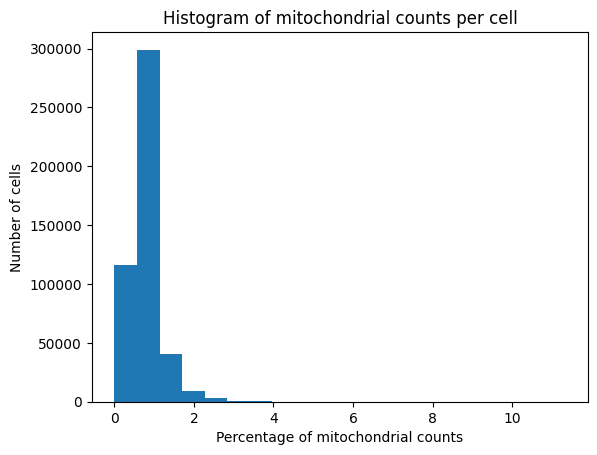

In [18]:
# Plot a histogram of the percentage of mitochondrial counts per cell
import matplotlib.pyplot as plt

plt.hist(adata_allcell.obs['pct_counts_mt'], bins=20)
plt.xlabel('Percentage of mitochondrial counts')
plt.ylabel('Number of cells')
plt.title('Histogram of mitochondrial counts per cell')
plt.show()

In [19]:
# set threshold for mitochondrial gene expression
mt_threshold = 1.75  # Adjust accordingly

# Filter cells with high mitochondrial gene expression
adata_allcell = adata_allcell[adata_allcell.obs['pct_counts_mt'] < mt_threshold]

In [20]:
adata_allcell.obs

,tissue_in_publication,assay_ontology_term_id,donor_id,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,...,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7633.0,2258,macrophage,Monocyte/Macrophage,True,immune,...,normal,Homo sapiens,male,liver,European,67-year-old human stage,2258,2832.564941,24.306885,0.858123
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,2858.0,1152,monocyte,Monocyte,True,immune,...,normal,Homo sapiens,male,liver,European,67-year-old human stage,1152,2031.360107,26.691013,1.313948
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7787.0,2981,endothelial cell of hepatic sinusoid,Endothelial,True,endothelial,...,normal,Homo sapiens,male,liver,European,67-year-old human stage,2981,3124.170654,19.321318,0.618446
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,10395.0,2594,macrophage,Monocyte/Macrophage,True,immune,...,normal,Homo sapiens,male,liver,European,67-year-old human stage,2594,2991.716553,21.863386,0.730797
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,6610.0,2124,liver dendritic cell,Dendritic cell,True,immune,...,normal,Homo sapiens,male,liver,European,67-year-old human stage,2124,2748.511475,25.091215,0.912902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P19_S379,Vasculature,EFO:0008931,TSP2,aorta,67836.0,1363,endothelial cell,endothelial cell,True,endothelial,...,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage,1363,1869.151489,23.880318,1.277602
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P21_S381,Vasculature,EFO:0008931,TSP2,aorta,20498.0,903,endothelial cell,endothelial cell,True,endothelial,...,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage,903,1605.408203,27.271030,1.698698
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367,Vasculature,EFO:0008931,TSP2,aorta,195639.0,2751,endothelial cell,endothelial cell,True,endothelial,...,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage,2751,2380.916016,23.713001,0.995961
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P8_S368,Vasculature,EFO:0008931,TSP2,aorta,37260.0,983,endothelial cell,endothelial cell,True,endothelial,...,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage,983,1604.927856,19.902174,1.240067


In [21]:
adata_allcell.var

,feature_type,highly_variable,means,dispersions,dispersions_norm,mean,std,feature_is_filtered,feature_name,feature_reference,feature_biotype,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
ensemblid,,,,,,,,,,,,,,,,,
ENSG00000223972,Gene Expression,False,0.000064,0.835044,-0.573947,0.000039,0.005574,False,DDX11L1,NCBITaxon:9606,gene,80,False,80,0.000327,99.982953,153.682648
ENSG00000227232,Gene Expression,False,0.002274,2.442280,0.533203,0.001080,0.031731,False,WASH7P,NCBITaxon:9606,gene,3048,False,3048,0.007627,99.350510,3579.362549
ENSG00000278267,Gene Expression,False,0.000062,1.295335,-0.256874,0.000033,0.005634,False,MIR6859-1,NCBITaxon:9606,gene,44,False,44,0.000201,99.990624,94.517403
ENSG00000243485,Gene Expression,False,0.000137,2.656352,0.680668,0.000048,0.008041,False,MIR1302-2HG,NCBITaxon:9606,gene,48,False,48,0.000181,99.989772,85.145004
ENSG00000237613,Gene Expression,False,0.000011,0.318123,-0.930031,0.000007,0.002288,False,FAM138A,NCBITaxon:9606,gene,16,False,16,0.000080,99.996591,37.716190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695,Gene Expression,False,0.963484,2.466404,0.154140,0.590065,0.741395,False,MT-ND6,NCBITaxon:9606,gene,237181,True,237181,0.453170,49.459717,212669.046875
ENSG00000210194,Gene Expression,False,0.160067,1.603787,-0.044396,0.083929,0.301820,False,MT-TE,NCBITaxon:9606,gene,44876,True,44876,0.111443,90.437490,52299.613281
ENSG00000198727,Gene Expression,False,4.367693,4.765751,-0.499747,3.874830,1.104192,False,MT-CYB,NCBITaxon:9606,gene,464695,True,464695,1.512316,0.979350,709726.312500


In [22]:
print(adata_allcell.obs['cell_type'])

AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1                                                       macrophage
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1                                                         monocyte
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1                             endothelial cell of hepatic sinusoid
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1                                                       macrophage
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1                                             liver dendritic cell
                                                                                   ...                 
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P19_S379                        endothelial cell
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P21_S381                        endothelial cell
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367                         endothelial cell
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P8_S368  

Number of Clusters: 19 



 
 Cluster Labels:

 [2 2 9 ... 7 7 7]


/tmp/ipykernel_27477/3976541036.py:19: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_allcell.obs['kmeans_clusters'] = c_labels


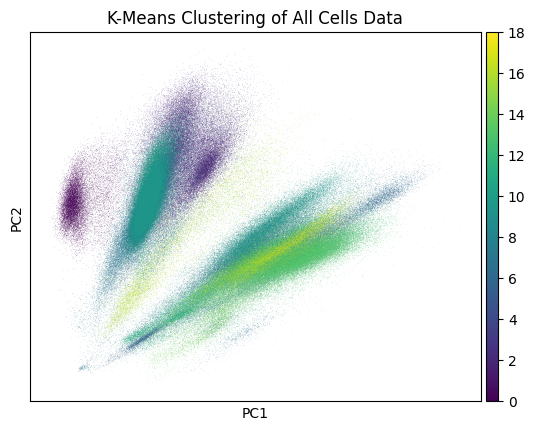

In [23]:
from sklearn.cluster import KMeans

# number of clusters - value of K from Elbow method
clusters_k = 19

print("Number of Clusters:",clusters_k, "\n\n")

#Initialize K-Means model 
K_Means = KMeans(n_clusters=clusters_k, random_state=0)

#train the model
K_Means.fit(adata_allcell.X)

# Extract cluster labels for each cell
c_labels = K_Means.labels_
print("\n \n Cluster Labels:\n\n",c_labels)

# Add cluster labels to AnnData object
adata_allcell.obs['kmeans_clusters'] = c_labels

# View clusters using PCA
sc.pl.pca(adata_allcell, color=['kmeans_clusters'], title="K-Means Clustering of All Cells Data")

Comparing k-means clusters with all original cell types

In [24]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances

# Retrieve centroids of the k-means clusters
kmeans_centroids = K_Means.cluster_centers_

# Convert matrices to numpy arrays if they are numpy.matrix instances
if isinstance(kmeans_centroids, np.matrix):
    kmeans_centroids = np.asarray(kmeans_centroids)

# Compute centroids of the original cell types
celltype_centroids = np.vstack([adata_allcell.X[adata_allcell.obs['cell_type'] == ct].mean(axis=0) for ct in adata_allcell.obs['cell_type'].cat.categories])

# Convert matrices to numpy arrays if they are numpy.matrix instances
if isinstance(celltype_centroids, np.matrix):
    celltype_centroids = np.asarray(celltype_centroids)

# Calculate distances between cell type centroids and k-means centroids, rows are cell types and columns are clusters
distances = pairwise_distances(celltype_centroids, kmeans_centroids)

# Find the index of the closest cluster for each cell type
closest_clusters = np.argmin(distances, axis=1)

# Mapping cell types to their closest clusters
cell_types = adata_allcell.obs['cell_type'].cat.categories
cluster_mapping = pd.DataFrame({
    'Cell Type': cell_types,
    'Closest Cluster': closest_clusters
})

print(cluster_mapping)

                               Cell Type  Closest Cluster
0                                  sperm               15
1                              stem cell               11
2                hematopoietic stem cell               10
3              erythroid progenitor cell               16
4              common myeloid progenitor               16
..                                   ...              ...
156  lung microvascular endothelial cell                9
157                 liver dendritic cell                2
158                 fibroblast of breast                3
159                         Mueller cell               11
160                          native cell                6

[161 rows x 2 columns]


In [25]:
pd.set_option('display.max_rows', 1070)
print(cluster_mapping)



                                             Cell Type  Closest Cluster
0                                                sperm               15
1                                            stem cell               11
2                              hematopoietic stem cell               10
3                            erythroid progenitor cell               16
4                            common myeloid progenitor               16
5                                           fibroblast               13
6                                        ciliated cell               11
7                                      epithelial cell               15
8                             ciliated epithelial cell               11
9                                 duct epithelial cell               11
10                       blood vessel endothelial cell                9
11                                    mesothelial cell               11
12                                              T cell          

Measuring the closeness/overlap

In [27]:
# Import necessary libraries
import numpy as np
import pandas as pd

from scipy.sparse import csr_matrix

# Ensure the centroids are in the correct format for operations
kmeans_centroids = np.array(K_Means.cluster_centers_)  # Ensure it's an ndarray

# Calculate the distances for each cluster using sparse operations
r1 = []
for i in range(kmeans_centroids.shape[0]):
    cluster_indices = adata_allcell.obs['kmeans_clusters'] == i
    cluster_points = adata_allcell.X[cluster_indices]  # Assuming this is a CSR matrix

    # Ensure centroid is broadcastable: make it a 2D array of shape (1, number of features)
    centroid = kmeans_centroids[i].reshape(1, -1)

    # Calculate squared distances to centroid: Sparse safe operation
    # Subtract centroid from each row in the sparse matrix
    if isinstance(cluster_points, csr_matrix):
    # Calculate squared differences to centroid without replicating centroid
        differences = cluster_points.copy()
        differences.data **= 2  # Square each element of the sparse matrix
        differences -= 2 * csr_matrix(centroid) * cluster_points
        centroid_squared = np.sum(centroid ** 2)
        differences += centroid_squared
        squared_differences = differences
    
        # Calculate the mean distance
        mean_distance = np.sqrt(squared_differences.mean(axis=1).A1)  # Compute mean, convert to numpy array
        r1.append(mean_distance)
    else:
        # Fallback if not sparse
        distances_squared = np.sum((cluster_points - centroid) ** 2, axis=1)
        mean_distance = np.sqrt(np.mean(distances_squared))
        r1.append(mean_distance)

r1 = np.array(r1)

# Calculate average distances within each original cell type (r2)
r2 = np.array([
    np.sqrt(np.mean(np.sum((adata_allcell.X[adata_allcell.obs['cell_type'] == ct] - celltype_centroids[idx])**2, axis=1)))
    for idx, ct in enumerate(adata_allcell.obs['cell_type'].cat.categories)
])

# Map r2 values to corresponding closest clusters
r2_mapped = r2[closest_clusters]

# Calculate r_bar as the average of r1 and the mapped r2
r_bar = (r1 + r2_mapped) / 2

# Retrieve the minimum distances (d) from previously calculated distances
d = np.min(distances, axis=1)

# Calculate normalized overlap
normalized_overlap = d / r_bar

# Create DataFrame to display results
results_df = pd.DataFrame({
    'Cell Type': adata_allcell.obs['cell_type'].cat.categories,
    'Closest Cluster': closest_clusters,
    'r1 (Cluster Radius)': r1,
    'r2 (Cell Type Radius)': r2_mapped,
    'd (Min Distance)': d,
    'r_bar (Average Radius)': r_bar,
    'Normalized Overlap': normalized_overlap
})

print(results_df)


MemoryError: Unable to allocate 41.0 GiB for an array with shape (2752678688, 2) and data type int64

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances

# Calculate average distances within each k-means cluster (r1)
r1 = np.array([np.mean(pairwise_distances(adata_allcell.X[adata_allcell.obs['kmeans_clusters'] == i])) for i in range(clusters_k)])

# Calculate average distances within each original cell type (r2)
r2 = np.array([np.mean(pairwise_distances(adata_allcell.X[adata_allcell.obs['cell_type'] == ct])) for ct in adata_allcell.obs['cell_type'].cat.categories])

# Retrieve the minimum distances (d) from previously calculated distances
d = np.min(distances, axis=1)

# Map closest cluster indices to r2 values
r2_mapped = r2[closest_clusters]

# Calculate r_bar as the average of r1 and the mapped r2
r_bar = (r1 + r2_mapped) / 2

# Calculate normalized overlap
normalized_overlap = d / r_bar

# Create DataFrame to display results
results_df = pd.DataFrame({
    'Cell Type': adata_allcell.obs['cell_type'].cat.categories,
    'Closest Cluster': closest_clusters,
    'r1 (Cluster Radius)': r1,
    'r2 (Cell Type Radius)': r2_mapped,
    'd (Min Distance)': d,
    'r_bar (Average Radius)': r_bar,
    'Normalized Overlap': normalized_overlap
})

print(results_df)

Confusion Matrix

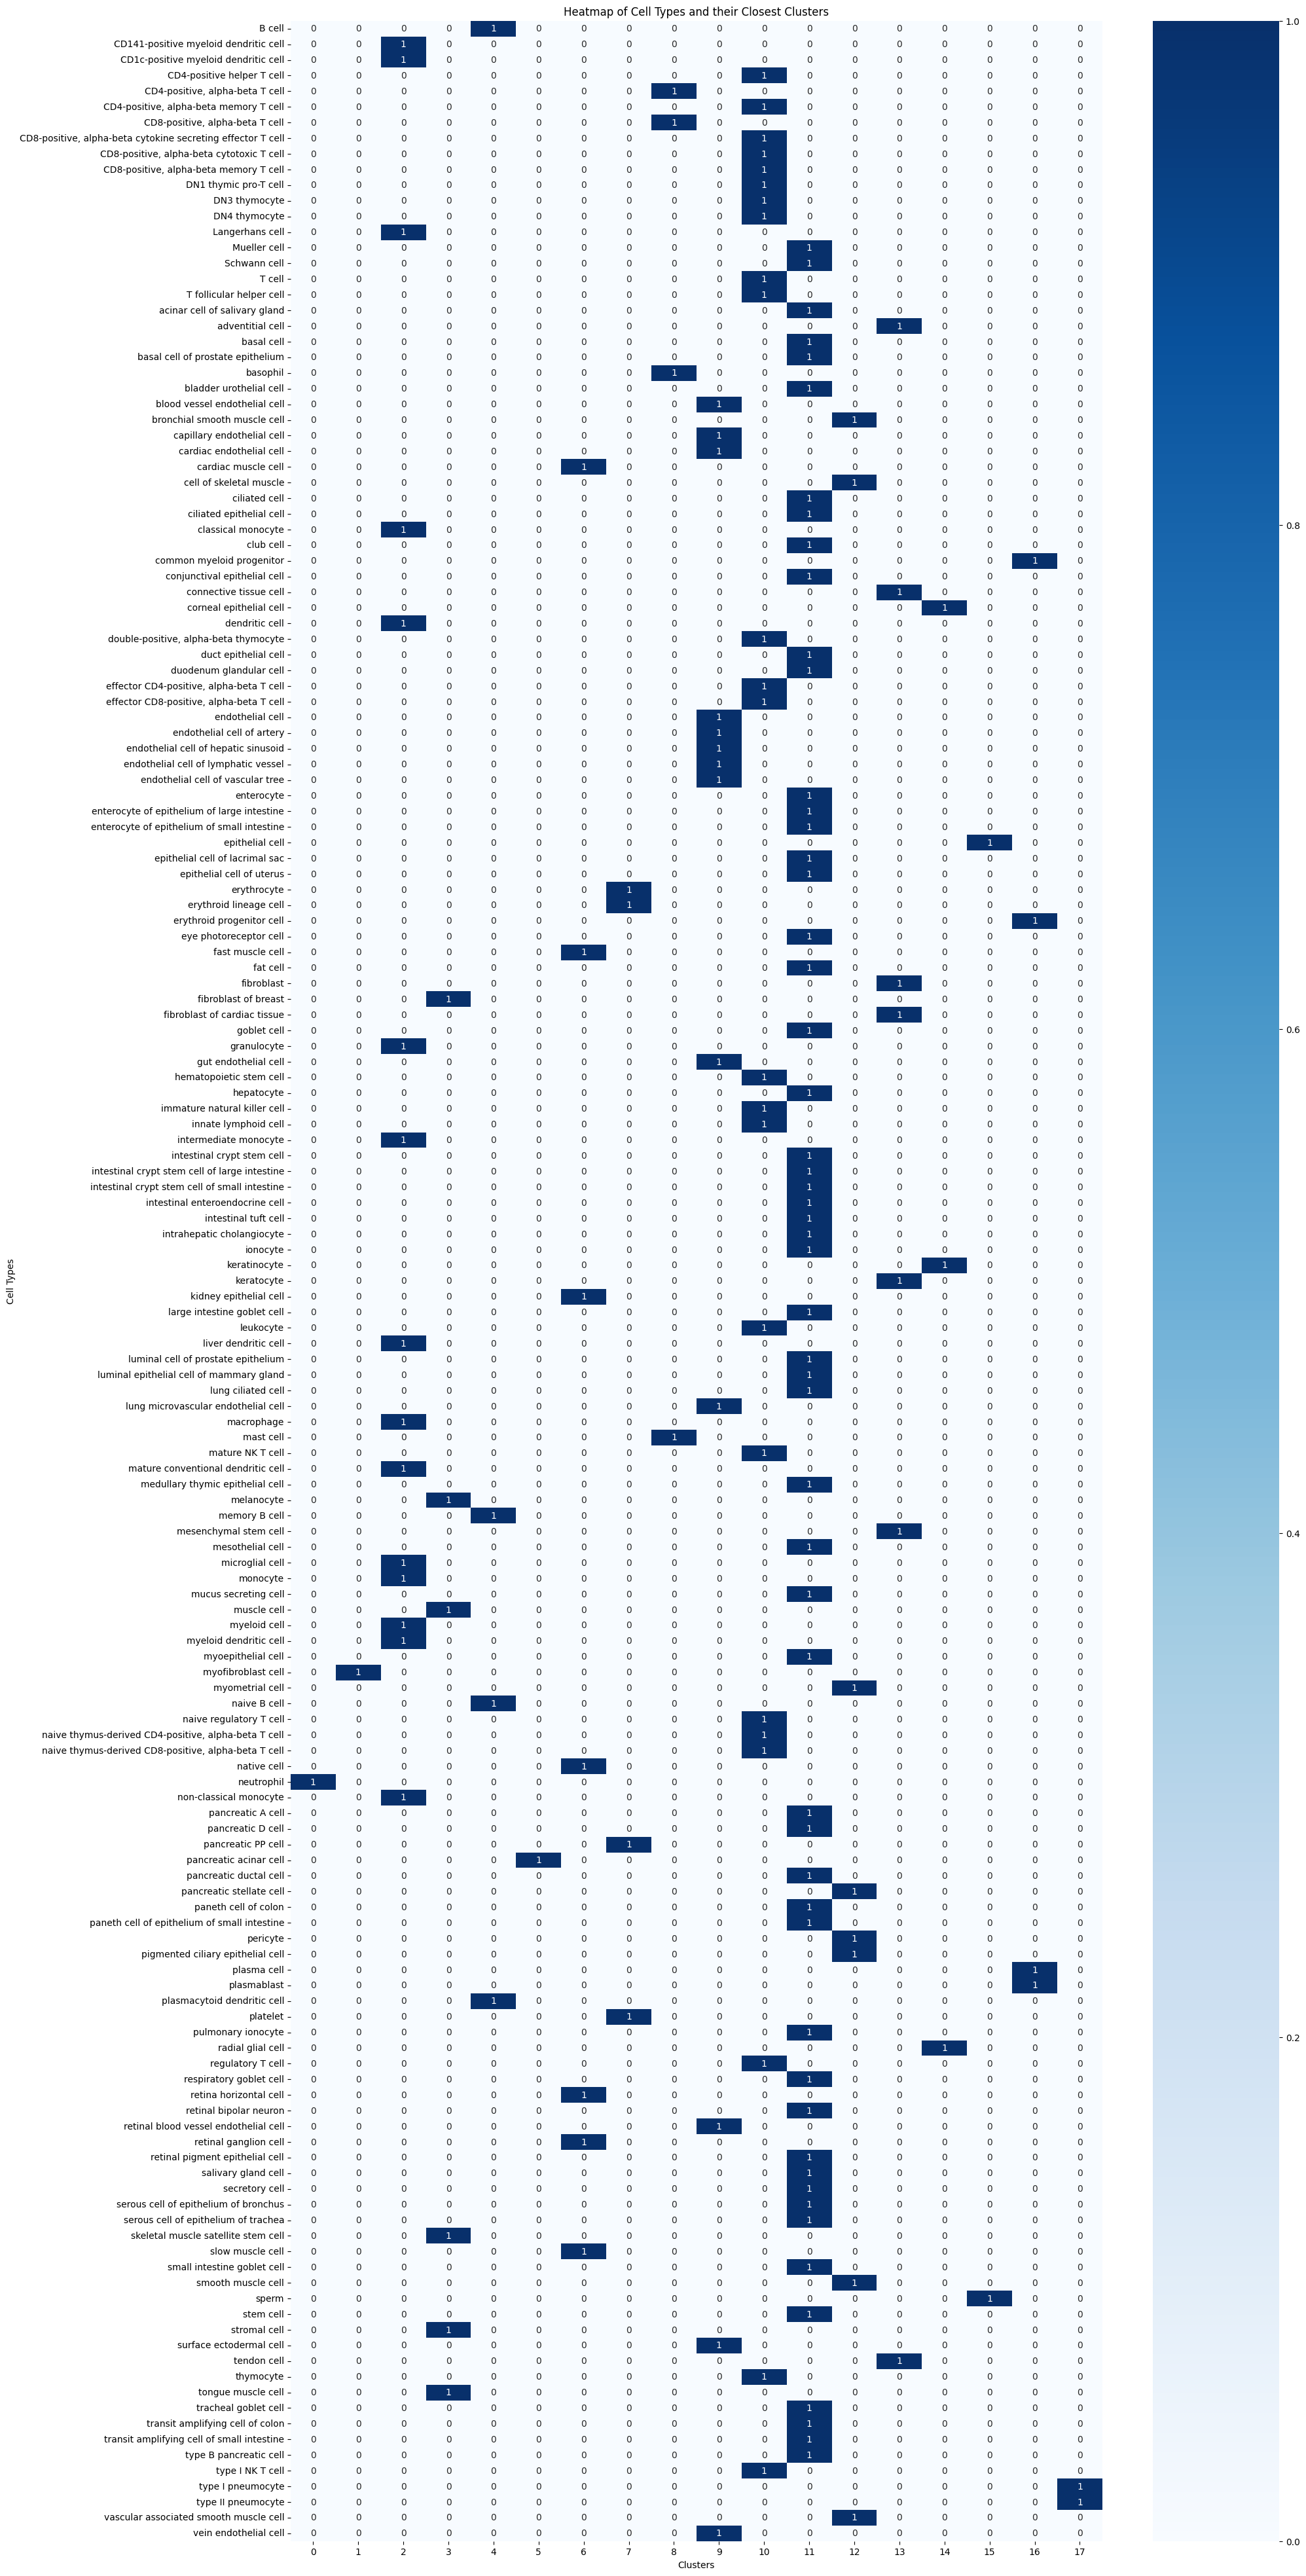

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
confusion_matrix_reverse = pd.crosstab(cell_types, closest_clusters)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(20, 50))
sns.heatmap(confusion_matrix_reverse, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Cell Types and their Closest Clusters')
plt.xlabel('Clusters')
plt.ylabel('Cell Types')
plt.show()

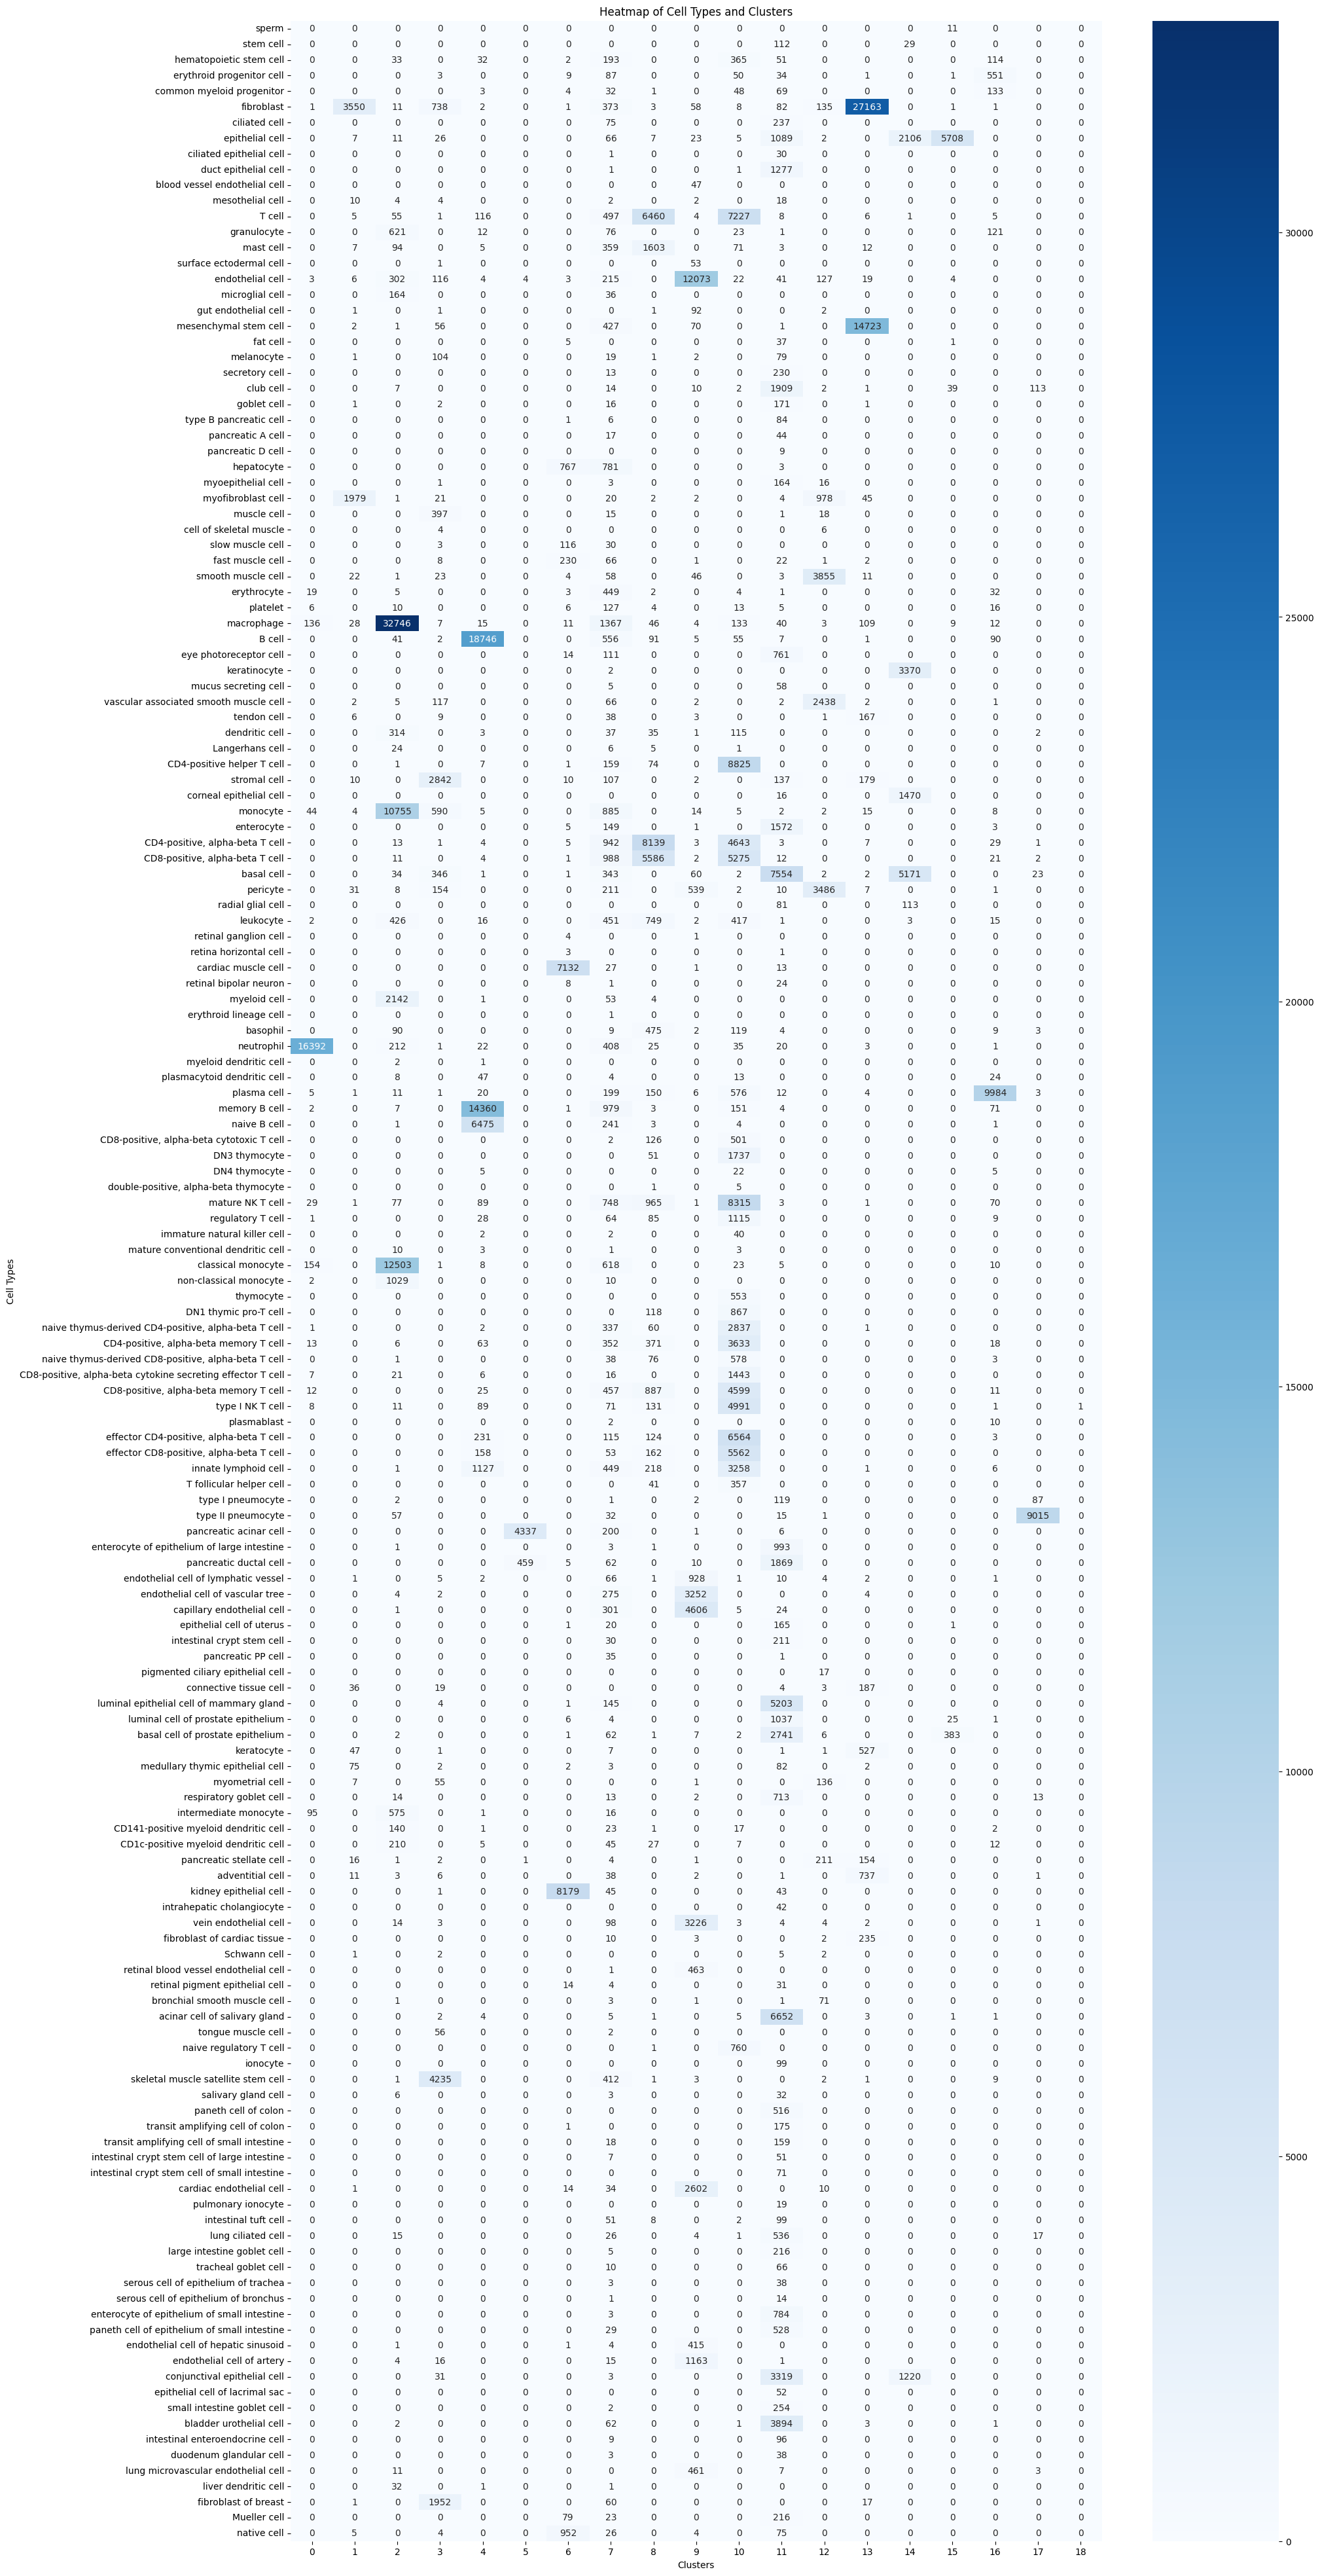

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix of cell types and all the kmeans clusters
confusion_matrix_reverse_ct = pd.crosstab(adata_allcell.obs['cell_type'], adata_allcell.obs['kmeans_clusters'])

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(20, 50))
sns.heatmap(confusion_matrix_reverse_ct, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Cell Types and Clusters')
plt.xlabel('Clusters')
plt.ylabel('Cell Types')
plt.show()

Ratio of Mapping

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the maximum counts of the most frequent cluster per cell type
max_counts = confusion_matrix_reverse_ct.max(axis=1)

# Calculate the total counts per cell type (sum across each row)
total_counts = confusion_matrix_reverse_ct.sum(axis=1)

# Calculate the ratio of the most frequent cluster count to the total counts
ratios = max_counts / total_counts

# Display the ratios
print("Ratios of the most frequent cluster per cell type to total counts per cell type:")
print(ratios)

Ratios of the most frequent cluster per cell type to total counts per cell type:
cell_type
sperm                                                          1.000000
stem cell                                                      0.794326
hematopoietic stem cell                                        0.462025
erythroid progenitor cell                                      0.748641
common myeloid progenitor                                      0.458621
fibroblast                                                     0.845488
ciliated cell                                                  0.759615
epithelial cell                                                0.630718
ciliated epithelial cell                                       0.967742
duct epithelial cell                                           0.998436
blood vessel endothelial cell                                  1.000000
mesothelial cell                                               0.450000
T cell                                       

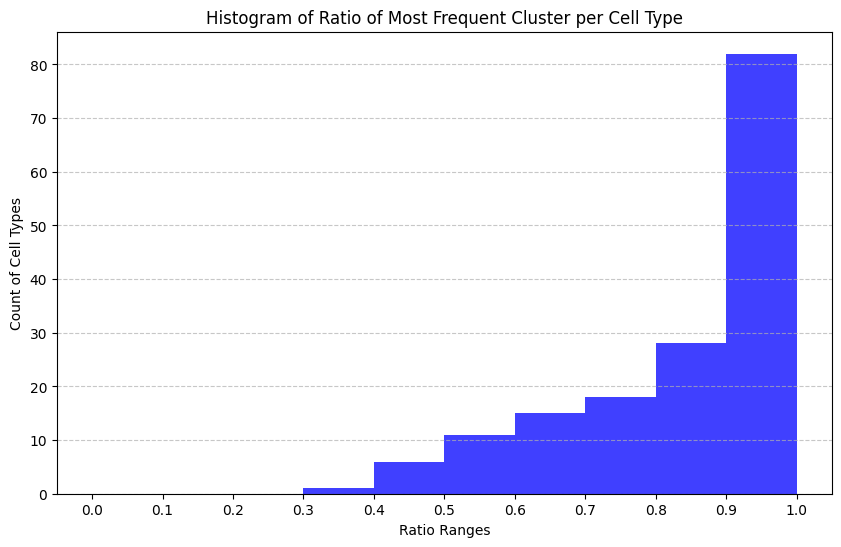

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'ratios' is a pandas Series containing all 161 ratios:
# Create bins for histogram
bins = [i * 0.1 for i in range(11)]  # Creates bins from 0.0 to 1.0 with a step of 0.1

# Calculate counts in each bin
hist, bin_edges = np.histogram(ratios, bins=bins)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], hist, width=0.1, align='edge', alpha=0.75, color='blue')
plt.xlabel('Ratio Ranges')
plt.ylabel('Count of Cell Types')
plt.title('Histogram of Ratio of Most Frequent Cluster per Cell Type')
plt.xticks(ticks=np.arange(0, 1.1, 0.1), labels=[f"{i:0.1f}" for i in np.arange(0, 1.1, 0.1)])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
